In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import img_to_array
from keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , BatchNormalization
from keras.callbacks import EarlyStopping
import cv2
import numpy as np
import os

2024-07-18 20:01:10.536764: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 20:01:10.536891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 20:01:10.678577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
random = np.random.randint(0,430)
img_path_angry = []
img_path_disgusted = []
img_path_fearful = []
img_path_happy = []
img_path_neutral = []
img_path_sad = []
img_path_surprised = []

classes = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

path = r'/kaggle/input/emotion-detection-fer/train'

for j in os.walk(path):
    if classes[0] in j[0]:
        for i in j[2]:
            img_path_angry.append(fr'{j[0]}/{i}')
    elif classes[1] in j[0]:
        for i in j[2]:
            img_path_disgusted.append(fr'{j[0]}/{i}')
    elif classes[2] in j[0]:
        for i in j[2]:
            img_path_fearful.append(fr'{j[0]}/{i}')
    elif classes[3] in j[0]:
        for i in j[2]:
            img_path_happy.append(fr'{j[0]}/{i}')
    elif classes[4] in j[0]:
        for i in j[2]:
            img_path_neutral.append(fr'{j[0]}/{i}')
    elif classes[5] in j[0]:
        for i in j[2]:
            img_path_sad.append(fr'{j[0]}/{i}')
    elif classes[6] in j[0]:
        for i in j[2]:
            img_path_surprised.append(fr'{j[0]}/{i}')

In [3]:
def plot_image():
    
    i = np.random.randint(0,100)

    img_angry = cv2.imread(img_path_angry[i])
    img_disgusted = cv2.imread(img_path_disgusted[i])
    img_fearful = cv2.imread(img_path_fearful[i])
    img_happy = cv2.imread(img_path_happy[i])
    img_neutral = cv2.imread(img_path_neutral[i])
    img_sad = cv2.imread(img_path_sad[i])
    img_surprised = cv2.imread(img_path_surprised[i])


    fig , axs = plt.subplots(1,7,figsize=[13,15])

    axs[0].imshow(img_angry)
    axs[0].set_title('Angry')
    
    axs[1].imshow(img_disgusted)
    axs[1].set_title('Disgusted')
    
    axs[2].imshow(img_fearful)
    axs[2].set_title('Fearful')

    axs[3].imshow(img_happy)
    axs[3].set_title('Happy')

    axs[4].imshow(img_neutral)
    axs[4].set_title('Neutral')

    axs[5].imshow(img_sad)
    axs[5].set_title('Sad')

    axs[6].imshow(img_surprised)
    axs[6].set_title('Suprised')

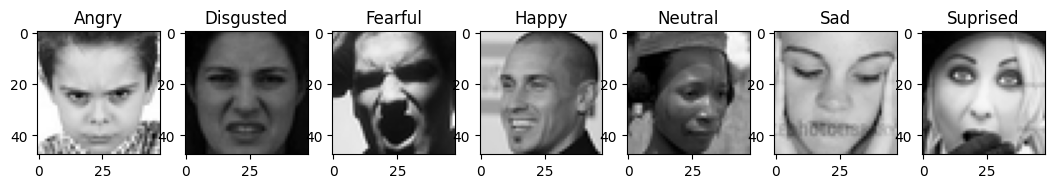

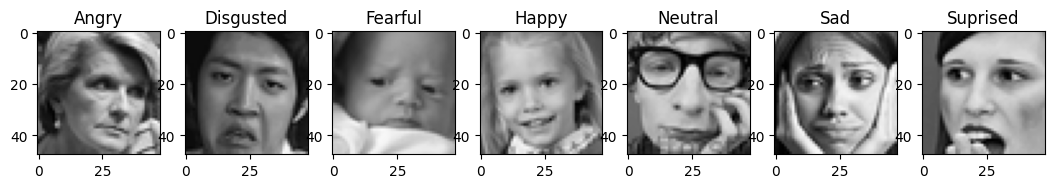

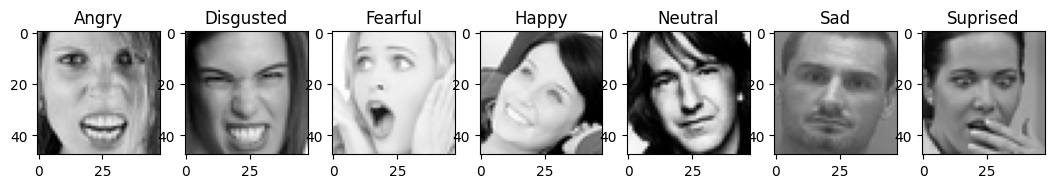

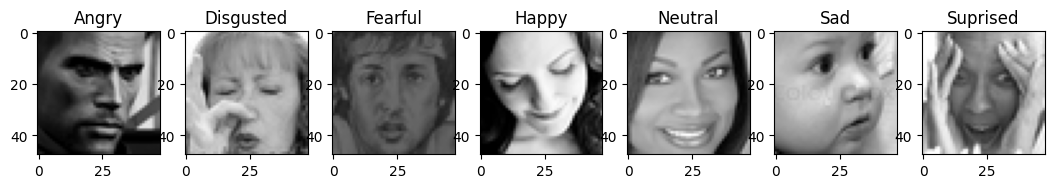

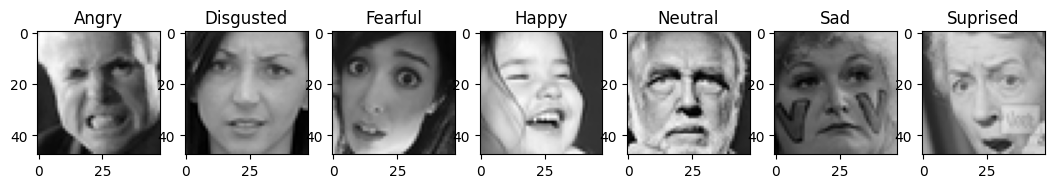

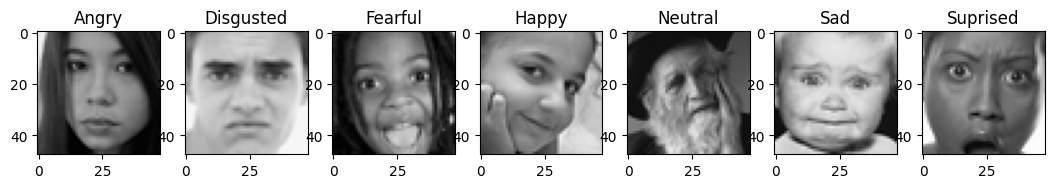

In [4]:
for i in range(0,6):
    plot_image()

In [5]:
data_gen = ImageDataGenerator(rescale = 1./255,
                              zoom_range = 0.2,
                              shear_range = 0.2,
                              validation_split=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
)

In [6]:
path = r'/kaggle/input/emotion-detection-fer/train'
train_dataset = data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical',
    subset = 'training',
    color_mode = 'grayscale'
)

Found 22968 images belonging to 7 classes.


In [7]:
path = r'/kaggle/input/emotion-detection-fer/train'
valid_dataset = data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical',
    subset = 'validation',
    color_mode = 'grayscale'
)

Found 5741 images belonging to 7 classes.


In [8]:
data_gen = ImageDataGenerator(rescale = 1./255,
)

In [9]:
path = r'/kaggle/input/emotion-detection-fer/test'
test_dataset = data_gen.flow_from_directory(
    path,
    target_size = (48,48),
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 7178 images belonging to 7 classes.


In [10]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same',kernel_regularizer='l2'))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,638,343 (32.95 MB)

 Trainable params: 8,637,703 (32.95 MB)

 Non-trainable params: 640 (2.50 KB)

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss=keras.losses.CategoricalCrossentropy(),metrics=['acc'])

In [13]:
early = EarlyStopping(monitor='val_loss',patience=10)

In [14]:
hist = model.fit(train_dataset,epochs=50,batch_size=64,validation_data=valid_dataset,steps_per_epoch=300,callbacks=[early])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-18 20:02:05.094894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.50943, expected 0.828027
2024-07-18 20:02:05.094961: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.3861, expected 1.7047
2024-07-18 20:02:05.094971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.56358, expected 1.88218
2024-07-18 20:02:05.094979: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.00481, expected 1.3234
2024-07-18 20:02:05.094988: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137

  3/300 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - acc: 0.2413 - loss: 24.0292   

I0000 00:00:1721332930.967489      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721332930.989840      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/300 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - acc: 0.2121 - loss: 23.3929

2024-07-18 20:02:35.299053: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 0.913074, expected 0.698697
2024-07-18 20:02:35.299119: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 0.916716, expected 0.702339
2024-07-18 20:02:35.299134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.801774, expected 0.587396
2024-07-18 20:02:35.299147: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 0.982335, expected 0.767958
2024-07-18 20:02:35.299166: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 191: 0.839342, expected 0.624965
2024-07-18 20:02:35.299181: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 720: 1.0785, expected 0.864118
2024-07-18 20:02:35.299192: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 845: 1.02572, expected 0.811343
2024-07-18 20:02:35.299203: E exte

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - acc: 0.2199 - loss: 22.9987

W0000 00:00:1721332985.175519      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-07-18 20:03:29.932080: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2304: 1.69301, expected 0.777275
2024-07-18 20:03:29.932148: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2305: 2.34068, expected 1.42494
2024-07-18 20:03:29.932163: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2306: 2.34997, expected 1.43423
2024-07-18 20:03:29.932179: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2307: 2.72023, expected 1.8045
2024-07-18 20:03:29.932194: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2308: 2.27603, expected 1.36029
2024-07-18 20:03:29.932205: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2309: 2.35418, expected 1.43845
2024-07-18 20:03:29.932215: E external/local_xl

300/300 ━━━━━━━━━━━━━━━━━━━━ 94s 267ms/step - acc: 0.2199 - loss: 22.9959 - val_acc: 0.2419 - val_loss: 20.3790
Epoch 2/50
  5/300 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - acc: 0.3004 - loss: 20.3625

W0000 00:00:1721333010.784918      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - acc: 0.2606 - loss: 19.8230 - val_acc: 0.2411 - val_loss: 17.6951
Epoch 3/50
118/300 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - acc: 0.2801 - loss: 17.4178

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - acc: 0.2850 - loss: 17.2344 - val_acc: 0.3067 - val_loss: 16.5441
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - acc: 0.2928 - loss: 15.9339 - val_acc: 0.3503 - val_loss: 14.0655
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - acc: 0.3188 - loss: 13.5289 - val_acc: 0.3553 - val_loss: 11.8138
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - acc: 0.3296 - loss: 11.5135 - val_acc: 0.3517 - val_loss: 11.0138
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - acc: 0.3404 - loss: 10.5240 - val_acc: 0.3571 - val_loss: 9.1381
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - acc: 0.3607 - loss: 8.7339 - val_acc: 0.3938 - val_loss: 7.5457
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - acc: 0.3713 - loss: 7.3853 - val_acc: 0.3853 - val_loss: 7.0318
Epoch 10/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - acc: 0.3705 - loss: 6.7644 - val_acc: 0.3944 - val_loss: 5.9353
Epoch 11/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 

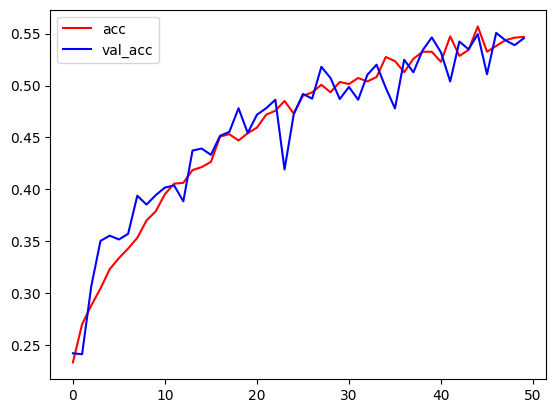

In [15]:
plt.plot(hist.history['acc'],color='r')
plt.plot(hist.history['val_acc'],color='b')
plt.legend(['acc','val_acc'])
plt.show()

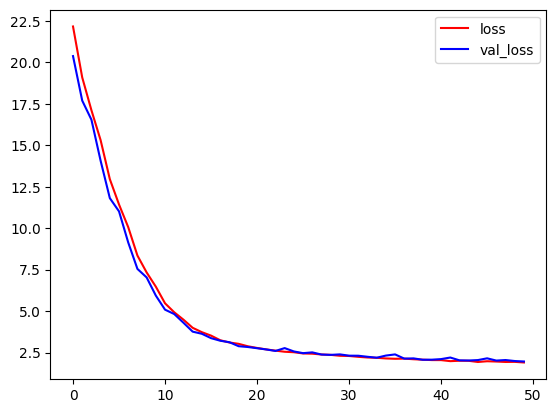

In [16]:
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.legend(['loss','val_loss'])
plt.show()

In [17]:
model.evaluate(test_dataset)

224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - acc: 0.5834 - loss: 1.8472

2024-07-18 20:18:31.194588: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.6297, expected 1.1253
2024-07-18 20:18:31.194650: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.33636, expected 1.83196
2024-07-18 20:18:31.194659: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.37284, expected 1.86844
2024-07-18 20:18:31.194667: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.90532, expected 2.40092
2024-07-18 20:18:31.194675: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.27154, expected 1.76715
2024-07-18 20:18:31.194682: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.18271, expected 1.67831
2024-07-18 20:18:31.194690: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.44143, expected 1.93703
2024-07-18 20:18:31.194698: E external/local_xla/xla/serv

225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - acc: 0.5833 - loss: 1.8473


W0000 00:00:1721333912.093433      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[1.8602937459945679, 0.5741153359413147]

In [18]:
model.save('model.h5')

In [19]:
random = np.random.randint(0,100)
img_path_angry = []
img_path_disgusted = []
img_path_fearful = []
img_path_happy = []
img_path_neutral = []
img_path_sad = []
img_path_surprised = []

classes = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

path = r'/kaggle/input/emotion-detection-fer/test'

for j in os.walk(path):
    if classes[0] in j[0]:
        for i in j[2]:
            img_path_angry.append(fr'{j[0]}/{i}')
    elif classes[1] in j[0]:
        for i in j[2]:
            img_path_disgusted.append(fr'{j[0]}/{i}')
    elif classes[2] in j[0]:
        for i in j[2]:
            img_path_fearful.append(fr'{j[0]}/{i}')
    elif classes[3] in j[0]:
        for i in j[2]:
            img_path_happy.append(fr'{j[0]}/{i}')
    elif classes[4] in j[0]:
        for i in j[2]:
            img_path_neutral.append(fr'{j[0]}/{i}')
    elif classes[5] in j[0]:
        for i in j[2]:
            img_path_sad.append(fr'{j[0]}/{i}')
    elif classes[6] in j[0]:
        for i in j[2]:
            img_path_surprised.append(fr'{j[0]}/{i}')

In [20]:
def plot_pred_image():
    
    i = np.random.randint(0,100)

    

    img_angry = cv2.imread(img_path_angry[i])
    img_disgusted = cv2.imread(img_path_disgusted[i])
    img_fearful = cv2.imread(img_path_fearful[i])
    img_happy = cv2.imread(img_path_happy[i])
    img_neutral = cv2.imread(img_path_neutral[i])
    img_sad = cv2.imread(img_path_sad[i])
    img_surprised = cv2.imread(img_path_surprised[i])
    
    img_angry = cv2.cvtColor(img_angry,cv2.COLOR_BGR2GRAY)
    img_disgusted = cv2.cvtColor(img_disgusted,cv2.COLOR_BGR2GRAY)
    img_fearful = cv2.cvtColor(img_fearful,cv2.COLOR_BGR2GRAY)
    img_happy = cv2.cvtColor(img_happy,cv2.COLOR_BGR2GRAY)
    img_neutral = cv2.cvtColor(img_neutral,cv2.COLOR_BGR2GRAY)
    img_sad = cv2.cvtColor(img_sad,cv2.COLOR_BGR2GRAY)
    img_surprised = cv2.cvtColor(img_surprised,cv2.COLOR_BGR2GRAY)

    img_angry_pre = img_to_array(img_angry) / 255
    img_disgusted_pre = img_to_array(img_disgusted) / 255
    img_fearful_pre = img_to_array(img_fearful) / 255
    img_happy_pre = img_to_array(img_happy) / 255
    img_neutral_pre = img_to_array(img_neutral) / 255
    img_sad_pre = img_to_array(img_sad) / 255
    img_surprised_pre = img_to_array(img_surprised) / 255

    img_angry_pre = np.expand_dims(img_angry_pre,axis=0)
    img_disgusted_pre = np.expand_dims(img_disgusted_pre,axis=0)
    img_fearful_pre = np.expand_dims(img_fearful_pre,axis=0)
    img_happy_pre = np.expand_dims(img_happy_pre,axis=0)
    img_neutral_pre = np.expand_dims(img_neutral_pre,axis=0)
    img_sad_pre = np.expand_dims(img_sad_pre,axis=0)
    img_surprised_pre = np.expand_dims(img_surprised_pre,axis=0)

    pred_angry = model.predict(img_angry_pre)
    pred_disgusted = model.predict(img_disgusted_pre)
    pred_fearful = model.predict(img_fearful_pre)
    pred_happy = model.predict(img_happy_pre)
    pred_neutral = model.predict(img_neutral_pre)
    pred_sad = model.predict(img_sad_pre)
    pred_surprised = model.predict(img_surprised_pre)

    print(pred_angry[0])
    
    angry_title_pred = classes[pred_angry[0].argmax()]
        
    disgusted_title_pred = classes[pred_disgusted[0].argmax()]
        
    fearful_title_pred = classes[pred_fearful[0].argmax()]
        
    happy_title_pred = classes[pred_happy[0].argmax()]
        
    neutral_title_pred = classes[pred_sad[0].argmax()]
        
    sad_title_pred = classes[pred_neutral[0].argmax()]
        
    surprised_title_pred = classes[pred_surprised[0].argmax()]
    
    img_angry = cv2.cvtColor(img_angry,cv2.COLOR_GRAY2BGR)
    img_disgusted = cv2.cvtColor(img_disgusted,cv2.COLOR_GRAY2BGR)
    img_fearful = cv2.cvtColor(img_fearful,cv2.COLOR_GRAY2BGR)
    img_happy = cv2.cvtColor(img_happy,cv2.COLOR_GRAY2BGR)
    img_neutral = cv2.cvtColor(img_neutral,cv2.COLOR_GRAY2BGR)
    img_sad = cv2.cvtColor(img_sad,cv2.COLOR_GRAY2BGR)
    img_surprised = cv2.cvtColor(img_surprised,cv2.COLOR_GRAY2BGR)


    fig , axs = plt.subplots(3,3,figsize=[11,13])

    axs[0][0].imshow(img_angry)
    axs[0][0].set_title(f'Predict:{angry_title_pred}  orginal:Angry')

    axs[0][1].imshow(img_disgusted)
    axs[0][1].set_title(f'Predict:{disgusted_title_pred}  orginal:Disgusted')

    axs[0][2].imshow(img_happy)
    axs[0][2].set_title(f'Predict:{fearful_title_pred}  orginal:Happy')

    axs[1][0].imshow(img_fearful)
    axs[1][0].set_title(f'Predict:{happy_title_pred}  orginal:Fearful')

    axs[1][1].imshow(img_neutral)
    axs[1][1].set_title(f'Predict:{neutral_title_pred}  orginal:Neutral')

    axs[1][2].imshow(img_sad)
    axs[1][2].set_title(f'Predict:{sad_title_pred}  orginal:Sad')

    axs[2][1].imshow(img_surprised)
    axs[2][1].set_title(f'Predict:{surprised_title_pred}  orginal:Surprised')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[2.4928629e-10 0.0000000e+00 1.0000000e+00 2.4179082e-25 6.1022607e-36
 1.0313727e-09 4.5903070e-26]


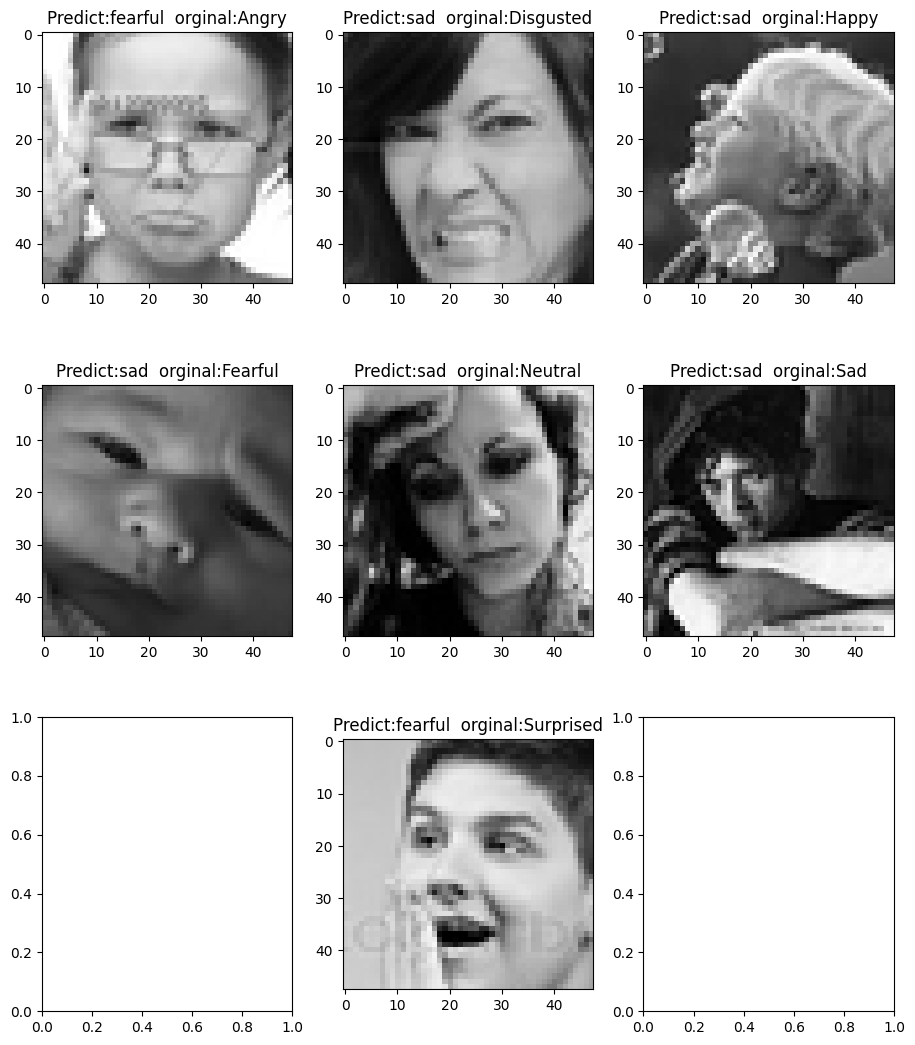

In [21]:
plot_pred_image()